In [307]:
%matplotlib inline
import sys
import errno
from fbprophet import Prophet
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

Global variables that sets the type of coin evaluated, prediction distance, the range the volatility is calculated from, and the total number of the total 

In [308]:
_coin_type = "bitcoin"
_forecast_distance=10
_volatility_range=10
_total_period = 30

Pulls the data from the appropriate csv file and saves it as a data frame

In [309]:
all_data = pd.read_csv("DataSources/" + _coin_type + "_hist.csv")

Prints frame data

In [310]:
all_data.describe()

,Unnamed: 1,close,high,low,market_cap,open,volume
count,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000,3.000000e+01
mean,14.500000,7694.972000,7909.194667,7450.799333,1.304854e+11,7697.783333,5.460464e+09
std,8.803408,780.582844,772.254339,752.251373,1.314147e+10,779.637485,1.153134e+09
min,0.000000,6636.320000,6857.490000,6526.870000,1.124670e+11,6630.510000,3.652500e+09
25%,7.250000,6925.397500,7146.130000,6804.537500,1.175560e+11,6928.830000,4.587882e+09
50%,14.500000,7861.145000,8058.610000,7239.685000,1.331640e+11,7855.750000,5.438975e+09
75%,21.750000,8302.752500,8490.347500,7980.930000,1.414882e+11,8342.482500,6.020878e+09
max,29.000000,8929.280000,9177.370000,8846.330000,1.513660e+11,8939.440000,8.906250e+09


Selects the appropriate amount of data from the full frame

In [311]:
_evaluated = all_data.head(_total_period)

Pulls the dates and prices from the data and creates the log and volatility columns

In [312]:
df = pd.DataFrame(zip(_evaluated.date , _evaluated.close), columns=['ds','price'])
df['log'] = np.log(df['price'])
df['vol'] = df['log'].rolling(_volatility_range).mean()

Shows statistics for the three columns

In [313]:
df.describe()

,price,log,vol
count,30.000000,30.000000,21.000000
mean,7694.972000,8.943370,8.913869
std,780.582844,0.101113,0.071716
min,6636.320000,8.800313,8.842080
25%,6925.397500,8.842944,8.854646
50%,7861.145000,8.969681,8.895784
75%,8302.752500,9.024327,8.956288
max,8929.280000,9.097091,9.052999


Displays kurtosis for the three data sources

In [314]:
df.kurtosis()

price   -1.510241
log     -1.571014
vol     -0.590217
dtype: float64

Displays skew for the three data sources

In [315]:
df.skew()

price    0.185681
log      0.109220
vol      0.852058
dtype: float64

Defines a method to extract and forecast the specified data stream

In [316]:
def gen_prophet(field):
    m = Prophet()
    df['y'] = df[field]
    m.fit(df)
    future = m.make_future_dataframe(periods=_forecast_distance)
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    return {"m":m, "f":forecast}

In [317]:
price = gen_prophet('price')

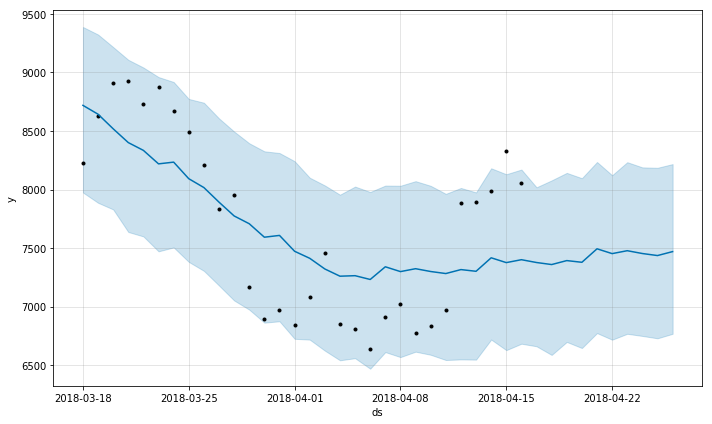

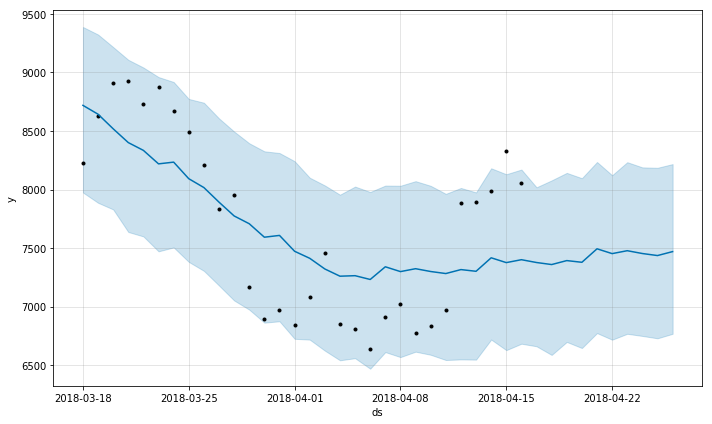

In [318]:
price['m'].plot(price['f'])

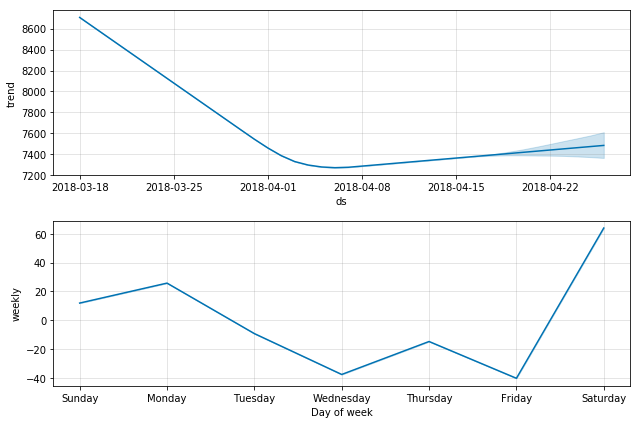

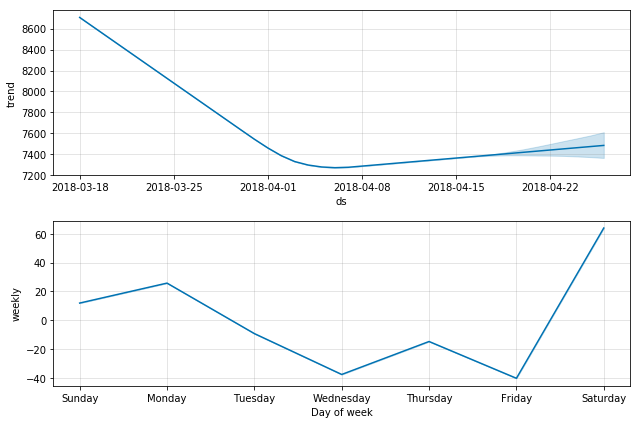

In [319]:
price['m'].plot_components(price['f'])

In [320]:
log = gen_prophet('log')

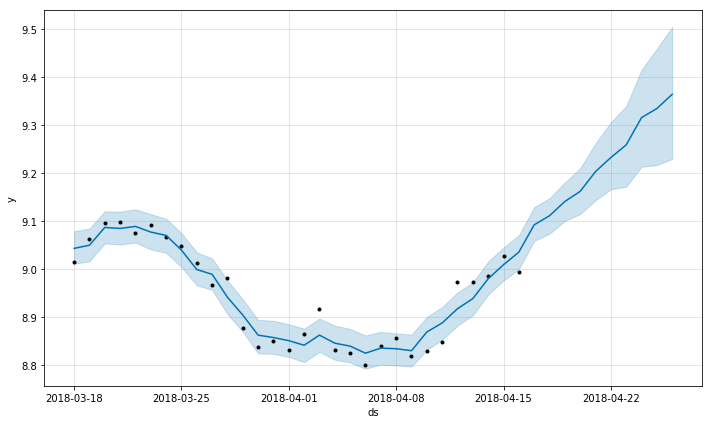

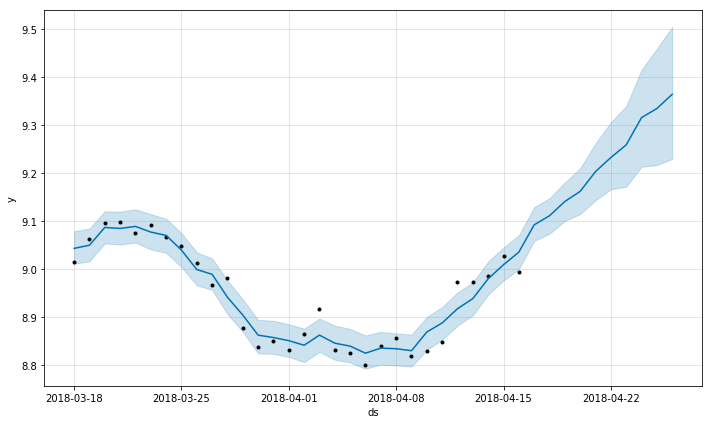

In [321]:
log['m'].plot(log['f'])

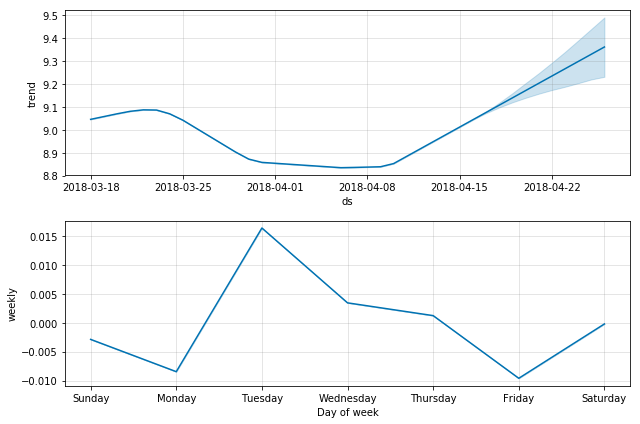

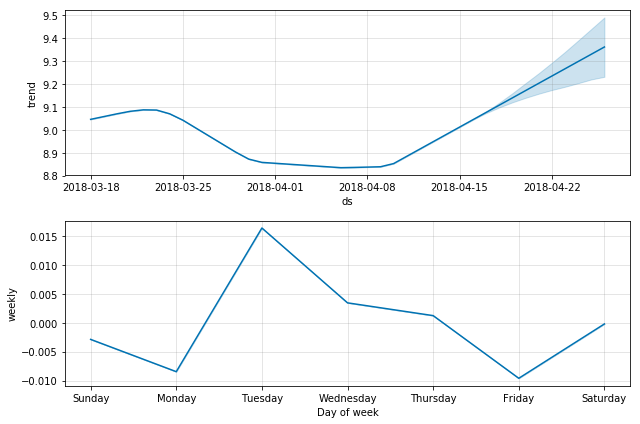

In [322]:
log['m'].plot_components(log['f'])

In [323]:
vol = gen_prophet('vol')

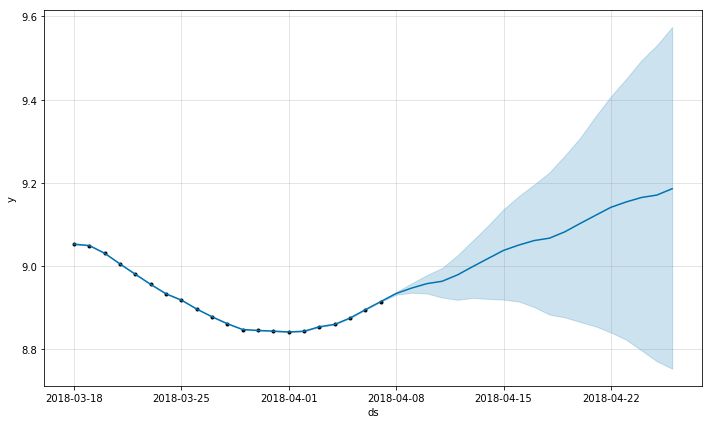

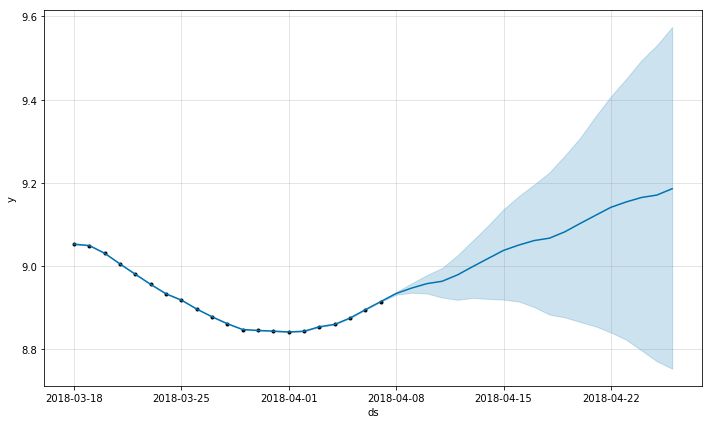

In [324]:
vol['m'].plot(vol['f'])

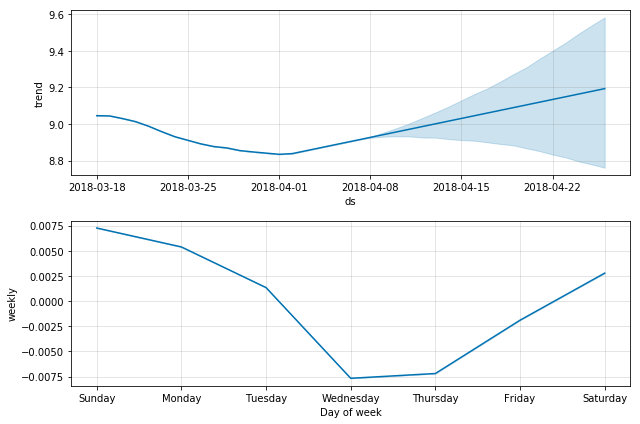

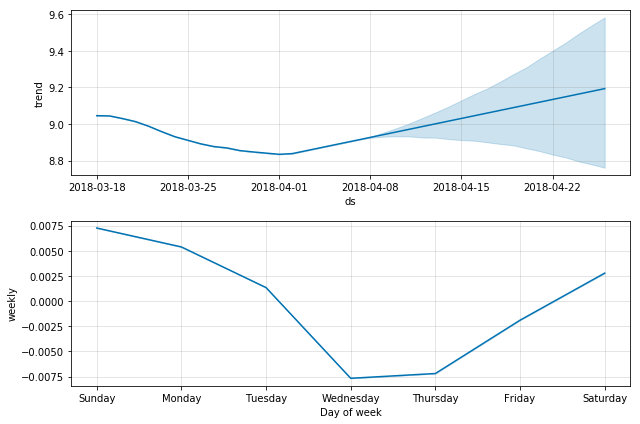

In [325]:
vol['m'].plot_components(vol['f'])

Defines method to plot the data with a red line and blue points overlayed

In [326]:
def gen_line(type):
    plt.plot(range(_total_period),list(df[type]),color='red',linewidth=2, zorder=1)
    plt.scatter(range(_total_period), list(df[type]), s=40, zorder=2)

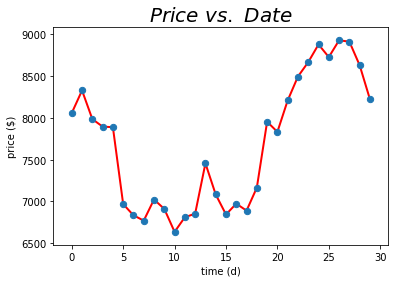

In [327]:
plt.title(r'$Price\ vs.\ Date$', fontsize=20)
plt.xlabel('time (d)')
plt.ylabel('price ($)')
gen_line('price')
plt.show()

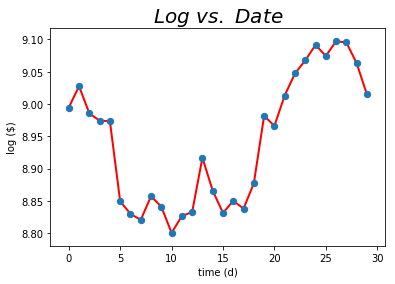

In [328]:
plt.title(r'$Log\  vs.\ Date$', fontsize=20)
plt.xlabel('time (d)')
plt.ylabel('log ($)')
gen_line('log')
plt.show()

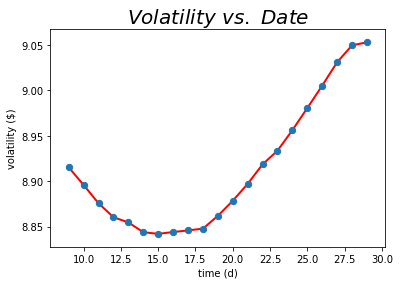

In [329]:
plt.title(r'$Volatility\  vs.\ Date$', fontsize=20)
plt.xlabel('time (d)')
plt.ylabel('volatility ($)')
gen_line('vol')
plt.show()